<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being able to extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression or any other suitable classifier.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [4]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [188]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
## YOUR CODE HERE

# call the url
result = requests.get(URL)

In [7]:
# create BeautifulSoup object
soup = BeautifulSoup(result.content, 'html.parser')

In [8]:
# check the result
soup

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script src="/s/e23f7f5/en_US.js" type="text/javascript"></script>
<script>!function(n){function r(n){for(var r=a,t=n.length;t;)r=33*r^n.charCodeAt(--t);return r>>>0}var t=this['indeed.i18n.localeData'],e=t['']||{},a=e.salt;if(e.hasOwnProperty('salt'))for(var i in n)t[function(n){var t=r(n);return e.hasOwnProperty('id_length')&&(t=String(t).substring(0,e.id_length)),t}(i)]=n[i];else for(var i in n)t[i]=[null].concat(n[i])}({"Speed up your job search":["Be ready when opportunity knocks"]});</script>
<link href="/s/97464e7/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York State" type="application/rss+xml"/>
<link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="only screen and (max-width: 640px)







\Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 



### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [9]:
## YOUR CODE HERE

# function to get location

def getloc(result):
    try:
        return result.find('span', {'class':'location'}).text
    except:
        return None


# function to get company name 

def getcomp(result):
    try:
        return result.find('span', {'class':'company'}).text
    except:
        return None

    
# function to get job 

def getjob(result):
    try:
        return result.find('a', {'data-tn-element':'jobTitle'}).text
    except:
        return None


# function to get salary 

def getsal(result):
    try:
        return result.find('span', {'class':'salary no-wrap'}).text
    except:
        return None


    


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [10]:
YOUR_CITY = 'Jeddah'

In [425]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        result = requests.get(url_template.format(city, start)) 
      
        # convert the result to BeautifulSoup object
        soup = BeautifulSoup(result.content, 'html.parser')
        # find the row result class
        for div in soup.find_all('div', {'class':"jobsearch-SerpJobCard row result"}):
            #Append to the full set of results
            results.append(div)
        if start != 0 and len(soup.find_all("span", {"class":"np"} ) )  != 2 :
            break 

        


KeyboardInterrupt: 


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [11]:

## YOUR CODE HERE

# create the dataframe
DS_jobs = pd.DataFrame(columns=['location', 'job_title', 'company', 'salary'])

In [ ]:
for cell in results:
    location = getloc(cell)
    job_title = getjob(cell)
    company = getcomp(cell)
    salary = getsal(cell)
    DS_jobs.loc[len(DS_jobs)] = [location, job_title, company, salary]

In [10]:
len(DS_jobs['salary'])

0

In [11]:
DS_jobs['salary'].isnull().sum().sum()

0

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

In [12]:
# load the files
DS_jobs = pd.read_csv('DS_jobs_7678.csv')

In [13]:


DS_jobs.shape

(7678, 5)

In [14]:
# drop index column
DS_jobs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
# show the data
DS_jobs.head()

,location,job_title,company,salary
0,"Miami, FL 33137 (Upper Eastside area)",Data Analysis Associate,\n\n Care Resource,NaN
1,"Miami, FL",Data Scientist,\n\n TracFone Wireless,NaN
2,"Fort Lauderdale, FL",DATA SCIENTIST,\n\n Ultimate Software,NaN
3,"Miami, FL",Manufacturing Scientist II,\n\n Beckman Coulter - Diagnostics,NaN
4,"Miami, FL",\: Market Research Data Analyst II,\n\n Beckman Coulter - Diagnostics,NaN


In [16]:
DS_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 4 columns):
location     7678 non-null object
job_title    7678 non-null object
company      7672 non-null object
salary       323 non-null object
dtypes: object(4)
memory usage: 240.0+ KB


In [17]:
# check the nulls 
DS_jobs.salary.isnull().sum().sum()

7355

In [18]:
# deop all the nulls 
DS_jobs.salary.dropna(inplace=True)

In [19]:
# check the nulls 
DS_jobs.salary.isnull().sum().sum()

0

In [20]:
# fill all th NaN with NA
# DS_jobs.salary = ['NA'if pd.isna(salary) else salary for salary in DS_jobs.salary ]
DS_jobs.dropna(how = 'any', inplace =True)

In [21]:
# convert the column to string
DS_jobs.salary = DS_jobs.salary.astype('str')

In [22]:
# import re to replcae all the space
import re

In [23]:
# replace the \n, the spcaes and the (Indeed est.)
DS_jobs.salary  = [ re.sub(' +', '', cell.replace('\n', '').replace('(Indeed est.)', '').replace('$','').replace(',','')) for cell in DS_jobs.salary]


#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.


In [24]:
# get the yearly salary and take the average 
ds_jobs_withSalary = [ cell.replace('ayear', '').split('-') for cell in DS_jobs.salary]

In [25]:
clean_salary = []

for cells in ds_jobs_withSalary:
    if cells[0] != 'NA':
        # monthly dalray
        if 'amonth' in cells[len(cells)-1]:
            cells[0] = float(cells[0].replace('amonth', ''))
            if len(cells) == 2:
                cells[1] = float(cells[1].replace('amonth', ''))
                # take the average then * 12 to make it yearly 
                avg = (cells[0]+cells[1])/2
            else:
                avg = cells[0]
            clean_salary.append(avg*12)
            
        # hourly salray
        elif 'anhour' in cells[len(cells)-1]:
            cells[0] = float(cells[0].replace('anhour', ''))
            if len(cells) == 2:
                cells[1] = float(cells[1].replace('anhour', ''))
                # take the average 
                avg = (cells[0] + cells[1])/2
            else:
                avg = cells[0] 
                # the Multiply with * 8 hours per day then * 5 days in the week then 52 week in the year
            clean_salary.append( str(avg*8*5*52) )
            
            
        # weely salary 
        elif 'aweek' in cells[len(cells)-1]:
            cells[0] = float(cells[0].replace('aweek', ''))
            if len(cells) == 2:
                cells[1] = float(cells[1].replace('aweek', ''))
                # take the average 
                avg = (cells[0] + cells[1])/2
            else:
                avg = cells[0] 
                # the Multiply with * 8 hours per day then * 5 days in the week then 52 week in the year
            clean_salary.append( str(avg*52) )  
        
        
        
        # yearly salary
        else:
            cells[0] = cells[0].replace('$','')
            if len(cells) == 2:
                cells[1] = cells[1].replace('$','')
                avg = (float(cells[0]) + float(cells[1]))/2
            else:
                avg = cells[0]
            clean_salary.append( str(avg) )
    else:
        clean_salary.append(cells[0]) 

In [26]:
# assign the clean salary to the salary in the DataFrame
DS_jobs.salary = clean_salary 

In [27]:
DS_jobs.head()

,location,job_title,company,salary
76,"Miami, FL 33130 (Little Havana area)",Data Analytics - Lead Instructor,\n Ironhack,80000.0
79,"Miami, FL 33134",Marketing Director,"\n ArisGlobal, LLC",125000.0
125,"Houston, TX 77030 (Medical area)",Research Scientist - Leukemia,\n\n MD Anderson Cancer Center,66500.0
131,"Houston, TX 77030 (Medical area)",Associate Scientist IIâ€“ In Vivo Pharmacology,\n\n MD Anderson Cancer Center,67000.0
142,"Houston, TX 77030 (Medical area)","Sr. Analyst, Data Analytics - Internal Audit",\n\n MD Anderson Cancer Center,88650.0


In [28]:
# convert the salray type to float
DS_jobs.salary = DS_jobs.salary.astype(float)

{'whiskers': [<matplotlib.lines.Line2D at 0x125bbc470>,
 'caps': [<matplotlib.lines.Line2D at 0x125bbcb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x125bbc048>],
 'medians': [<matplotlib.lines.Line2D at 0x125bbcef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125bcf518>],
 'means': []}

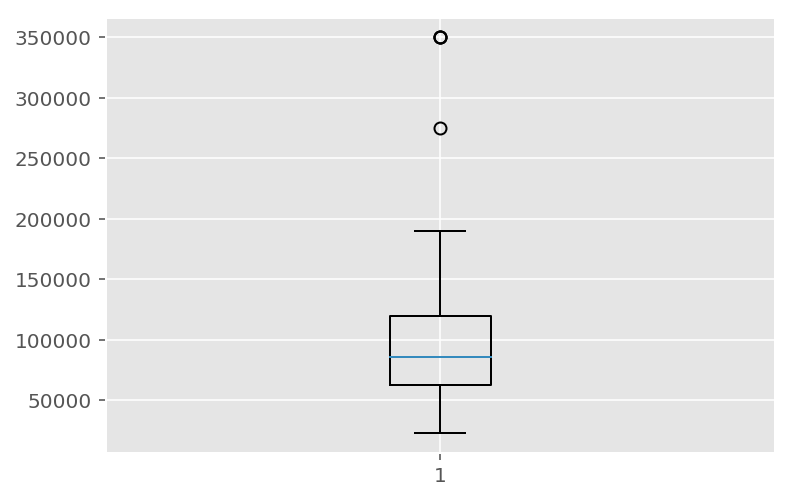

In [29]:
# outliers
plt.boxplot(DS_jobs.salary)

In [30]:

# remove the ouliers that more than 1 std away from the mean
salarymean = np.mean(DS_jobs.salary)
salarystd = np.std(DS_jobs.salary)


# create the mask
mask = ( DS_jobs.salary < ( salarymean + salarystd ) )

# get the dataframe without outliers
salarywithoutoutliers = DS_jobs.loc[mask, :]

# check the length
len(salarywithoutoutliers)

279

In [31]:
DS_jobs = salarywithoutoutliers

In [32]:
# check the null values
DS_jobs.isnull().sum()

location     0
job_title    0
company      0
salary       0
dtype: int64

In [33]:
# check the nulls
DS_jobs.isnull().sum()

location     0
job_title    0
company      0
salary       0
dtype: int64

In [34]:
# check the nulls
DS_jobs.company.fillna('NA', inplace=True)

In [35]:

# remove the \n and the scpaes from company name
DS_jobs.company = [ re.sub(' +', '', company.replace('\n', '')) for company in DS_jobs.company if company != None]

In [36]:
# check the dataframe
DS_jobs.head()

,location,job_title,company,salary
76,"Miami, FL 33130 (Little Havana area)",Data Analytics - Lead Instructor,Ironhack,80000.0
79,"Miami, FL 33134",Marketing Director,"ArisGlobal,LLC",125000.0
125,"Houston, TX 77030 (Medical area)",Research Scientist - Leukemia,MDAndersonCancerCenter,66500.0
131,"Houston, TX 77030 (Medical area)",Associate Scientist IIâ€“ In Vivo Pharmacology,MDAndersonCancerCenter,67000.0
142,"Houston, TX 77030 (Medical area)","Sr. Analyst, Data Analytics - Internal Audit",MDAndersonCancerCenter,88650.0


In [37]:
# check the duplicated values
DS_jobs.duplicated().sum()

35

In [38]:
# drop the duplicates
DS_jobs.drop_duplicates(inplace=True)

In [39]:
# check the duplicated values
DS_jobs.duplicated().sum()

0

### Save your results as a CSV

In [40]:
## YOUR CODE HERE
DS_jobs.to_csv('clean_ds_job.csv', index=False)


## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your model's performance.

#### Load in the the data of scraped salaries

In [41]:
## YOUR CODE HERE
DS_jobs = pd.read_csv('clean_ds_job.csv')

In [42]:
DS_jobs.head()

,location,job_title,company,salary
0,"Miami, FL 33130 (Little Havana area)",Data Analytics - Lead Instructor,Ironhack,80000.0
1,"Miami, FL 33134",Marketing Director,"ArisGlobal,LLC",125000.0
2,"Houston, TX 77030 (Medical area)",Research Scientist - Leukemia,MDAndersonCancerCenter,66500.0
3,"Houston, TX 77030 (Medical area)",Associate Scientist IIâ€“ In Vivo Pharmacology,MDAndersonCancerCenter,67000.0
4,"Houston, TX 77030 (Medical area)","Sr. Analyst, Data Analytics - Internal Audit",MDAndersonCancerCenter,88650.0


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [43]:
## YOUR CODE HERE

In [44]:
DS_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
location     244 non-null object
job_title    244 non-null object
company      244 non-null object
salary       244 non-null float64
dtypes: float64(1), object(3)
memory usage: 7.7+ KB


In [45]:
# get the sum of all the flaot numbers
avg_salary = np.median([ salary for salary in DS_jobs.salary if not pd.isna(salary) ])

In [46]:
avg_salary

81000.0

In [47]:
# add new columns to indicate the binary variable HIGH vs LOW salary
high_salary = [ 1 if salary >= avg_salary else 0 for salary in DS_jobs.salary ]

In [48]:
# assign high_salary to the dataframe
DS_jobs['high_salary'] = high_salary

In [49]:
DS_jobs.head()

,location,job_title,company,salary,high_salary
0,"Miami, FL 33130 (Little Havana area)",Data Analytics - Lead Instructor,Ironhack,80000.0,0
1,"Miami, FL 33134",Marketing Director,"ArisGlobal,LLC",125000.0,1
2,"Houston, TX 77030 (Medical area)",Research Scientist - Leukemia,MDAndersonCancerCenter,66500.0,0
3,"Houston, TX 77030 (Medical area)",Associate Scientist IIâ€“ In Vivo Pharmacology,MDAndersonCancerCenter,67000.0,0
4,"Houston, TX 77030 (Medical area)","Sr. Analyst, Data Analytics - Internal Audit",MDAndersonCancerCenter,88650.0,1


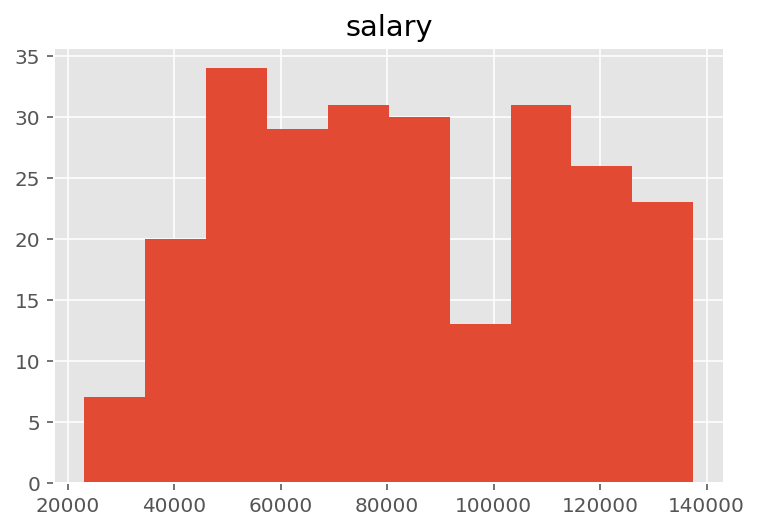

In [50]:
pd.DataFrame(DS_jobs).hist('salary');

#### Thought experiment: What is the baseline accuracy for this model?

In [51]:
# count the values
DS_jobs.high_salary.value_counts()

1    123
0    121
Name: high_salary, dtype: int64

In [52]:
## YOUR CODE HERE
#the basline is 1- median(y)
basline =  1 - (DS_jobs.high_salary.value_counts()[0])/ (DS_jobs.high_salary.value_counts()[0] + DS_jobs.high_salary.value_counts()[1])
basline

0.5040983606557377

### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

#### Model taking into account job levels and categories:

- Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value? 
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models. 
- Discuss model coefficients or feature importances as applicable.

#### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

#### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

## Model based on location:

In [194]:
## YOUR CODE HERE

# assgin x, y using only location
y = DS_jobs.high_salary
X = DS_jobs['location']

In [195]:
# create dummies values
X_withdummies = pd.get_dummies(X)

In [196]:
# show the shape
X_withdummies.shape

(244, 97)

In [197]:
# import split
from sklearn.model_selection import train_test_split

In [198]:
# split X, y to test and train
X_train, X_test, y_train, y_test = train_test_split(X_withdummies, y, test_size=0.25, random_state=0)

In [199]:
# import 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [200]:
# init the model logistic regression from sklearn
lr = LogisticRegression()

In [201]:
# fit the model
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [202]:
print('Score for the train data', cross_val_score(lr, X_train, y_train).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for the train data 0.6011134614254656


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
print('Score for the test data', cross_val_score(lr, X_test, y_test).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for the test data 0.6547619047619048


In [204]:
y_pre = cross_val_predict(lr, X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [205]:
# import metrics
from sklearn import metrics

In [206]:
# the accuracy 
print(metrics.accuracy_score(y_train, y_pre))

0.6010928961748634


In [207]:
# confusion matrix
print(metrics.classification_report(y_train, y_pre))


              precision    recall  f1-score   support

           0       0.57      0.87      0.69        94
           1       0.70      0.31      0.43        89

   micro avg       0.60      0.60      0.60       183
   macro avg       0.64      0.59      0.56       183
weighted avg       0.63      0.60      0.57       183



In [208]:
# import the auc 
from sklearn.metrics import roc_auc_score


AUC: 0.593


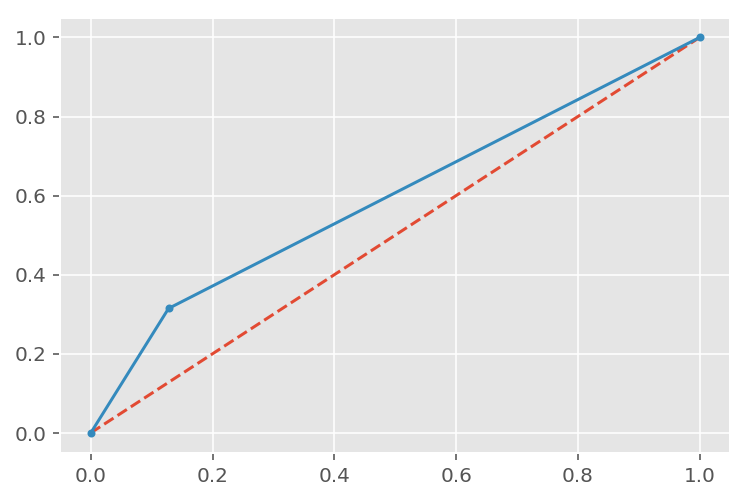

In [209]:
# auc for the lr model with location 
auc = roc_auc_score(y_train, y_pre)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, y_pre)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [210]:
# import 
import statsmodels.api as sm

In [211]:
X.head()

0    Miami, FL 33130 (Little Havana area)
1                         Miami, FL 33134
2        Houston, TX 77030 (Medical area)
3        Houston, TX 77030 (Medical area)
4        Houston, TX 77030 (Medical area)
Name: location, dtype: object

In [235]:
# init the model logistic regression from statmodels
lr_sm = sm.Logit(y_train, X_train)

In [233]:
# fit the model
lr_model = lr_sm.fit(method='bfgs')

         Current function value: 0.361934
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [234]:
# print the summary
lr_model.summary2()

/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Logit
==========================================================================================
Model:                       Logit                    Pseudo R-squared:         0.478     
Dependent Variable:          high_salary              AIC:                      286.4677  
Date:                        2019-01-20 10:31         BIC:                      533.5982  
No. Observations:            183                      Log-Likelihood:           -66.234   
Df Model:                    76                       LL-Null:                  -126.78   
Df Residuals:                106                      LLR p-value:              0.00077696
Converged:                   0.0000                   Scale:                    1.0000    
------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.  z  P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Albany, NY                                         2.8133      nan nan   nan    nan    nan
Alpharetta, GA                                     2.8133      nan nan   nan    nan    nan
Atlanta, GA                                        0.0000      nan nan   nan    nan    nan
Auburn, WA 98092                                   0.0000      nan nan   nan    nan    nan
Austin, TX                                        -0.4045      nan nan   nan    nan    nan
Bellevue, WA                                       6.0271      nan nan   nan    nan    nan
Bellevue, WA 98007 (Lake Hills area)              -2.8133      nan nan   nan    nan    nan
Bellevue, WA 98008 (Crossroads area)              -2.8133      nan nan   nan    nan    nan
Berkeley, CA                                      -1.5152      nan nan   nan    nan    nan
Bothell, WA 98011                                  0.0000      nan nan   nan    nan    nan
Boulder, CO                                        0.8656      nan nan   nan    nan    nan
Boulder, CO 80303 (Southeast Boulder area)        -4.6035      nan nan   nan    nan    nan
Boulder, CO 80305 (Central Boulder area)          -2.8133      nan nan   nan    nan    nan
Buckley AFB, CO                                    2.8133      nan nan   nan    nan    nan
Buffalo, NY 14226                                  2.8133      nan nan   nan    nan    nan
Cheektowaga, NY                                    0.0000      nan nan   nan    nan    nan
Chicago, IL                                        6.0271      nan nan   nan    nan    nan
Chicago, IL 60601 (Loop area)                      2.8133      nan nan   nan    nan    nan
Chicago, IL 60603 (Loop area)                      2.8133      nan nan   nan    nan    nan
Chicago, IL 60631 (Norwood Park area)             -2.8133      nan nan   nan    nan    nan
Chicago, IL 60642 (Portage Park area)             -2.8133      nan nan   nan    nan    nan
Chicago, IL 60654 (Loop area)                      2.8133      nan nan   nan    nan    nan
Conshohocken, PA                                   2.8133      nan nan   nan    nan    nan
Conshohocken, PA 19428                             0.0000      nan nan   nan    nan    nan
Cranberry Township, PA                             2.8133      nan nan   nan    nan    nan
Dallas, TX                                         2.7819      nan nan   nan    nan    nan
Dallas, TX 75201 (City Center District area)       2.8133      nan nan   nan    nan    nan
Dallas, TX 75246 (Northeast Dallas area)          -2.8133      nan nan   nan    nan    nan
Dallas-Fort Worth, TX                              0.0000      nan nan   nan    nan    nan
Denver, CO                                         0.0000      nan nan   nan    nan    nan
Duluth, GA                                        -2.8133      nan nan   nan    nan    nan
Fort Drum, NY                                      0.0000      nan nan   nan

In [215]:
# predict the y value
y_pre = lr_model.predict(X_train)

AUC: 0.908


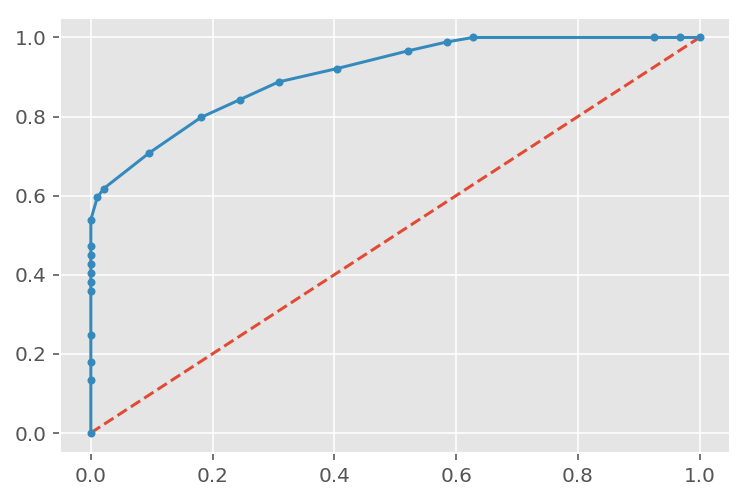

In [216]:
# auc for the lr model with location 
auc = roc_auc_score(y_train, y_pre)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, y_pre)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## The summary :
The first challenge that I faced is remove the Nan because Python deal with Nan different than the Nulls, so I delete all the Nulls and Nan and it gave me better accuracy than before. Using only the location gave us poor accurcy. 


## Model taking into account job levels and categories:

In [217]:
# assign X, y 
y = DS_jobs.high_salary
X = DS_jobs['job_title']

In [218]:
# import 
from sklearn.feature_extraction.text import CountVectorizer

In [219]:
# create new features from the job title

# initi count vectorizer 
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

In [220]:
# fit the model
cvec.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.05,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [221]:
# create a DataFrame for the count vectorizer resukt
job_title_nlp = pd.DataFrame(cvec.transform(X).todense(),
                       columns=cvec.get_feature_names())


In [222]:
# show the word_observe
job_title_nlp.head()

,analyst,associate,data,data analyst,data scientist,engineer,research,research analyst,scientist,senior,software,software engineer
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0


In [223]:
# let's see the most comman job title
job_title_nlp.sum(axis=0).sort_values(ascending=False)[1:10]

analyst              57
scientist            54
research             48
engineer             44
senior               36
software             27
software engineer    25
data scientist       25
data analyst         15
dtype: int64

In [224]:
# split X, y to test and train
X_train, X_test, y_train, y_test = train_test_split(job_title_nlp, y, test_size=0.25, random_state=0)

In [225]:
# fir lr model with the nlp data
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [226]:
print('Score for the train data', cross_val_score(lr, X_train, y_train).mean())

Score for the train data 0.6991391973676478


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
print('Score for the test data', cross_val_score(lr, X_test, y_test).mean())

Score for the test data 0.7222222222222223


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [228]:
y_pre = cross_val_predict(lr, X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [229]:
# the accuracy 
print(metrics.accuracy_score(y_train, y_pre))

0.6994535519125683


In [230]:
# confusion matrix
print(metrics.classification_report(y_train, y_pre))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        94
           1       0.73      0.61      0.66        89

   micro avg       0.70      0.70      0.70       183
   macro avg       0.70      0.70      0.70       183
weighted avg       0.70      0.70      0.70       183



AUC: 0.697


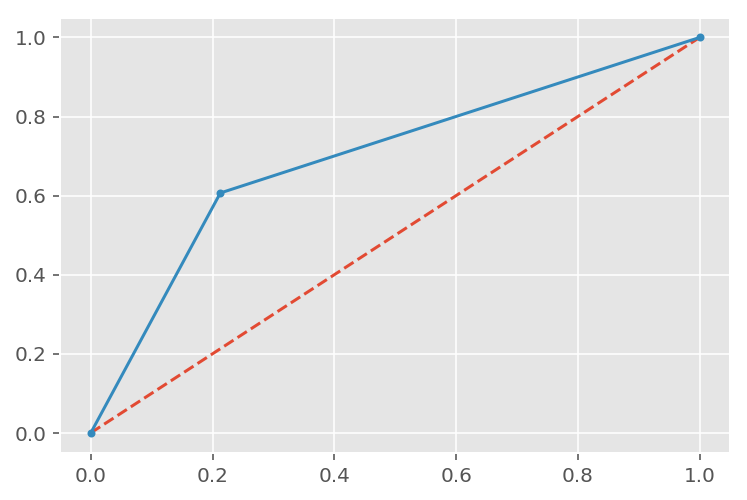

In [231]:
# auc for the lr model with location 
auc = roc_auc_score(y_train, y_pre)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, y_pre)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [236]:
# now wit the lr from the statmodels

# init the model logistic regression from statmodels
lr_sm = sm.Logit(y_train, X_train)

In [237]:
# fit the model
lr_model = lr_sm.fit(method='bfgs')

         Current function value: 0.532028
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [238]:
# print the summary
lr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.232     
Dependent Variable: high_salary      AIC:              218.7222  
Date:               2019-01-20 10:32 BIC:              257.2361  
No. Observations:   183              Log-Likelihood:   -97.361   
Df Model:           11               LL-Null:          -126.78   
Df Residuals:       171              LLR p-value:      1.5262e-08
Converged:          0.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
analyst           -0.2057   0.5040 -0.4081 0.6832 -1.1935  0.7821
associate         -3.9313   2.7810 -1.4136 0.1575 -9.3820  1.5194
data               0.7230   0.4615  1.5666 0.1172 -0.1815  1.6275
data analyst      -2.8670   1.3147 -2.1807 0.0292 -5.4438 -0.2902
data scientist    -0.1378   0.9127 -0.1510 0.8800 -1.9268  1.6511
engineer           1.5706   0.8294  1.8936 0.0583 -0.0550  3.1962
research          -1.5092   0.6261 -2.4106 0.0159 -2.7363 -0.2821
research analyst   0.9862   0.9771  1.0094 0.3128 -0.9288  2.9012
scientist          0.3635   0.5861  0.6202 0.5351 -0.7852  1.5123
senior            -0.1527   0.5857 -0.2607 0.7943 -1.3005  0.9952
software           0.1051   1.4162  0.0742 0.9409 -2.6706  2.8807
software engineer  0.7393   1.8252  0.4051 0.6854 -2.8380  4.3167
=================================================================

"""

In [239]:
# predict the y value
y_pre = lr_model.predict(X_train)

AUC: 0.798


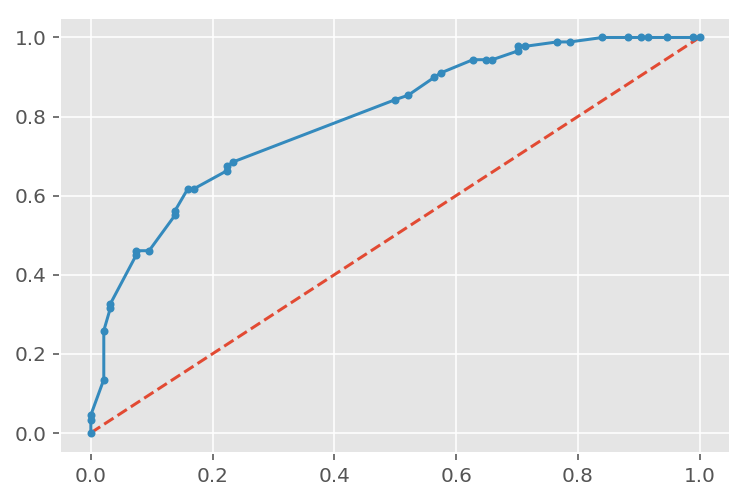

In [240]:
# auc for the lr model with location 
auc = roc_auc_score(y_train, y_pre)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, y_pre)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## The summary :
The nlp dose not improve the socre that much. 

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [389]:
## YOUR LINK HERE IN MARKDOWN FORMAT 